### Initialize the raw data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import r2_score
from matplotlib import ticker
import pandas as pd

I = [a/10 for a in range(5,23)]
I_err = [0.005 for a in range(5,23)]
P_out = [0.20,0.70,1.32,1.96,2.81,3.98,5.34,6.29,7.54,8.26,9.62,10.81,10.50,11.21,12.30,13.70,14.67,17.12]
P_out_err = [0.01/2 for a in range(5,23)]
P_LD = [55,134,219,300,384,471,549,634,705,789,867,947,1021,1110,1181,1270,1334,1415]
P_LD_err = [1/2 for a in range(5,23)]

eta = [ P_out[a]/P_LD[a] for a in range(23-5) ]
eta_err = [ eta[a]*np.sqrt((P_out_err[a]/P_out[a])**2 + (P_LD_err[a]/P_LD[a])**2) for a in range(23-5) ]


print(eta)
print(eta_err)

[0.0036363636363636364, 0.005223880597014925, 0.006027397260273973, 0.006533333333333333, 0.007317708333333333, 0.008450106157112527, 0.009726775956284153, 0.009921135646687698, 0.010695035460992907, 0.010468948035487959, 0.011095732410611302, 0.011414994720168955, 0.01028403525954946, 0.0100990990990991, 0.010414902624894157, 0.01078740157480315, 0.010997001499250375, 0.012098939929328622]
[9.673305711338533e-05, 4.209790864104312e-05, 2.6657587211309233e-05, 1.9908432359488923e-05, 1.613474371615692e-05, 1.3898244452499268e-05, 1.2705168420528798e-05, 1.1109211740797887e-05, 1.038429107293406e-05, 9.174607055326469e-06, 8.614212115451813e-06, 8.012517269668604e-06, 7.024674342151175e-06, 6.401973881789511e-06, 6.112826857303328e-06, 5.791123565277678e-06, 5.571158235872144e-06, 5.5465141015243155e-06]


### Ready to plot it!

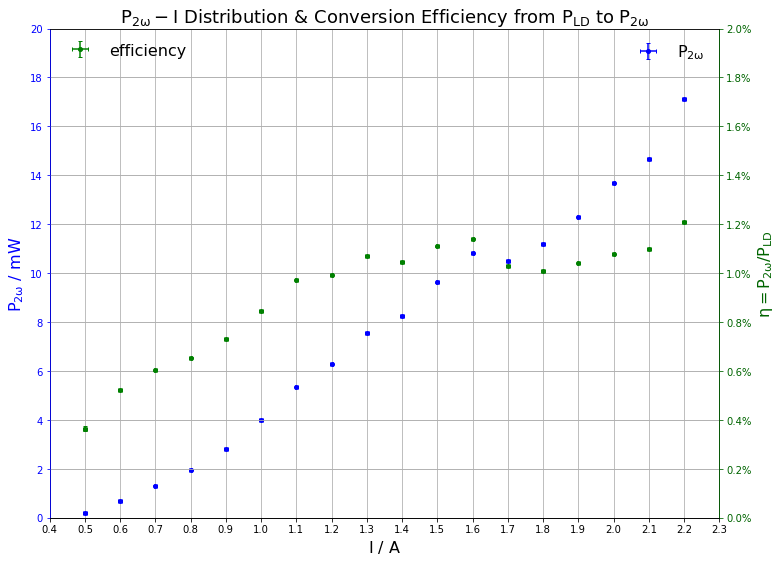

In [9]:
#plt.scatter(x, y, label='data')
fig=plt.figure(figsize=(12,9))

ax1 = fig.add_subplot(111)
ax1.errorbar(I, P_out, xerr=I_err, yerr=P_out_err ,fmt='o', label=r'$\rm P_{2\omega}$', color='blue', markersize=4, ecolor='blue', capsize=2)
ax1.legend(loc=1, frameon=False, fontsize=16)
ax1.set_ylabel(r'$\rm P_{2\omega}\ /\ mW$', fontsize=16, color="blue") 
ax1.set_xlabel(r'$\rmI\ /\ A$', fontsize=16, color="black") 
ax1.grid()
ax1.set_ylim(0,20)
#ax1.yaxis.label.set_color('red') 
ax1.tick_params(axis='y', colors='blue') 

ax2 = ax1.twinx()
ax2.errorbar(I, eta, xerr=I_err, yerr=eta_err,fmt='o', label='efficiency', color='green', markersize=4, ecolor='green', capsize=2)
ax2.legend(loc=2, frameon=False, fontsize=16)
ax2.set_ylim(0,0.02)
#ax2.set_xlim([0, np.e])
#ax2.set_xlabel('Same X for both exp(-x) and ln(x)')
ax2.set_ylabel(r'$\rm \eta = P_{2\omega}/P_{LD}$', fontsize=16, color="darkgreen")
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
ax2.tick_params(axis='y', colors='darkgreen') 

x_major_locator=MultipleLocator(0.1)
y1_major_locator=MultipleLocator(2)
y2_major_locator=MultipleLocator(0.002)

ax1.xaxis.set_major_locator(x_major_locator)
ax1.yaxis.set_major_locator(y1_major_locator)
ax2.yaxis.set_major_locator(y2_major_locator)

plt.title(r"$\rm P_{2\omega}-I$ Distribution & Conversion Efficiency from $\rm P_{LD}$ to $\rm P_{2\omega}$", fontsize=18)
#plt.xlabel(r'$\rmI\ /\ A$', fontsize=16, color="black") 
plt.grid(True)
#plt.legend(loc='best', frameon=False)
plt.xlim(0.4,2.3)
#plt.ylim(-5,110)
#plt.axis([30, 400, 100, 400])
#plt.plot(myline, mymodel(myline), color = 'green', linestyle='dashed', label='Linear Fit')
#plt.text(0.5, 1400,r"$y=%.5fx%.5f$"%(a1,a0), fontsize=16,color="green")
ax=plt.gca()
ax.spines['left'].set_color('blue')
ax.spines['right'].set_color('darkgreen')

plt.savefig('phyex5_fig.pdf')
plt.show()